In [42]:
import pandas as pd

# Load the CSV file
file_path = 'Thunderbird_2k.log_structured.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(data.head())

   LineId Label   Timestamp        Date   User Month  Day      Time  \
0       1     -  1131566461  2005.11.09  dn228   Nov    9  12:01:01   
1       2     -  1131566461  2005.11.09  dn228   Nov    9  12:01:01   
2       3     -  1131566461  2005.11.09  dn228   Nov    9  12:01:01   
3       4     -  1131566461  2005.11.09  dn261   Nov    9  12:01:01   
4       5     -  1131566461  2005.11.09  dn261   Nov    9  12:01:01   

      Location        Component     PID  \
0  dn228/dn228  crond(pam_unix)  2915.0   
1  dn228/dn228  crond(pam_unix)  2915.0   
2  dn228/dn228            crond  2916.0   
3  dn261/dn261  crond(pam_unix)  2907.0   
4  dn261/dn261  crond(pam_unix)  2907.0   

                                   Content EventId  \
0             session closed for user root    E117   
1  session opened for user root by (uid=0)    E118   
2  (root) CMD (run-parts /etc/cron.hourly)      E3   
3             session closed for user root    E117   
4  session opened for user root by (uid=0)  

In [43]:
# Step 1: Remove duplicate rows
data_cleaned = data.drop_duplicates()

# Step 2: Handle missing values
# Filling missing 'PID' values with the mean
data_cleaned['PID'].fillna(data_cleaned['PID'].mean(), inplace=True)

# Step 3: Convert 'Timestamp' to a datetime format
data_cleaned['DateTime'] = pd.to_datetime(data_cleaned['Timestamp'], unit='s')

# Step 4: Drop irrelevant columns
# Dropping columns like 'LineId', 'Date', 'Month', 'Day', and 'Time' as they may not provide useful information
data_cleaned.drop(['LineId', 'Date', 'Month', 'Day', 'Time'], axis=1, inplace=True)

# Display the cleaned data
print(data_cleaned.head())


  Label   Timestamp   User     Location        Component     PID  \
0     -  1131566461  dn228  dn228/dn228  crond(pam_unix)  2915.0   
1     -  1131566461  dn228  dn228/dn228  crond(pam_unix)  2915.0   
2     -  1131566461  dn228  dn228/dn228            crond  2916.0   
3     -  1131566461  dn261  dn261/dn261  crond(pam_unix)  2907.0   
4     -  1131566461  dn261  dn261/dn261  crond(pam_unix)  2907.0   

                                   Content EventId  \
0             session closed for user root    E117   
1  session opened for user root by (uid=0)    E118   
2  (root) CMD (run-parts /etc/cron.hourly)      E3   
3             session closed for user root    E117   
4  session opened for user root by (uid=0)    E118   

                             EventTemplate            DateTime  
0             session closed for user root 2005-11-09 20:01:01  
1  session opened for user root by (uid=0) 2005-11-09 20:01:01  
2  (root) CMD (run-parts /etc/cron.hourly) 2005-11-09 20:01:01  
3     

In [44]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders for categorical features
label_encoders = {}

# 2. Encoding Categorical Features
# Label encoding for categorical features
for col in ['User', 'Location', 'Component', 'EventId', 'EventTemplate']:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le  # Store the label encoder for future use

# 3. Text Feature Engineering using TF-IDF
# Assuming the TF-IDF code provided earlier is used

# 4. Statistical Features: Group by 'User' and compute mean PID
data_cleaned['User_Mean_PID'] = data_cleaned.groupby('User')['PID'].transform('mean')

# Drop the original 'DateTime' column after extracting features
data_cleaned.drop(['DateTime'], axis=1, inplace=True)

# Display the data with new features
print(data_cleaned.head())

  Label   Timestamp  User  Location  Component     PID  \
0     -  1131566461   415       408         25  2915.0   
1     -  1131566461   415       408         25  2915.0   
2     -  1131566461   415       408         24  2916.0   
3     -  1131566461   419       412         25  2907.0   
4     -  1131566461   419       412         25  2907.0   

                                   Content  EventId  EventTemplate  \
0             session closed for user root       20            137   
1  session opened for user root by (uid=0)       21            138   
2  (root) CMD (run-parts /etc/cron.hourly)       72              2   
3             session closed for user root       20            137   
4  session opened for user root by (uid=0)       21            138   

   User_Mean_PID  
0    2915.333333  
1    2915.333333  
2    2915.333333  
3    2907.333333  
4    2907.333333  


In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choose scaling method: Standardization or Normalization
scaler = StandardScaler()  # For standardization
# scaler = MinMaxScaler()  # Uncomment this for normalization

# Selecting numerical columns for scaling
numerical_features = ['PID', 'Timestamp']  # Add more numerical columns if needed

# Applying scaling
data_cleaned[numerical_features] = scaler.fit_transform(data_cleaned[numerical_features])

# Display the scaled data
print(data_cleaned.head())

  Label  Timestamp  User  Location  Component       PID  \
0     -  -1.770786   415       408         25 -0.766502   
1     -  -1.770786   415       408         25 -0.766502   
2     -  -1.770786   415       408         24 -0.766403   
3     -  -1.770786   419       412         25 -0.767293   
4     -  -1.770786   419       412         25 -0.767293   

                                   Content  EventId  EventTemplate  \
0             session closed for user root       20            137   
1  session opened for user root by (uid=0)       21            138   
2  (root) CMD (run-parts /etc/cron.hourly)       72              2   
3             session closed for user root       20            137   
4  session opened for user root by (uid=0)       21            138   

   User_Mean_PID  
0    2915.333333  
1    2915.333333  
2    2915.333333  
3    2907.333333  
4    2907.333333  


In [46]:
print(data_cleaned.columns)

Index(['Label', 'Timestamp', 'User', 'Location', 'Component', 'PID', 'Content',
       'EventId', 'EventTemplate', 'User_Mean_PID'],
      dtype='object')


In [102]:
# Assuming 'Label' is your target variable
X = data_cleaned.drop('Label', axis=1)
y = data_cleaned['Label']

# Encode the target variable if it's categorical
y = LabelEncoder().fit_transform(y.astype(str))


In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
# If you haven't already, scale the features
numerical_features = ['PID', 'Timestamp', 'User_Mean_PID']  # Add any other numerical features
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [105]:
# Reshape X_train and X_test
# For simplicity, using 1 time step
X_train_rnn = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_rnn = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

# Build RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Adjust output layer based on your labels

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [107]:
# Train the model
model.fit(X_train_rnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_rnn, y_test))

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9942 - loss: 0.0554 - val_accuracy: 1.0000 - val_loss: 3.5178e-06
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 1.0000 - loss: 3.0301e-04 - val_accuracy: 1.0000 - val_loss: 1.6979e-06
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.9998 - loss: 0.0076 - val_accuracy: 1.0000 - val_loss: 2.7886e-07
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 1.0000 - loss: 3.1228e-08 - val_accuracy: 1.0000 - val_loss: 1.6873e-07
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.9999 - loss: 1.9807e-04 - val_accuracy: 1.0000 - val_loss: 1.2549e-07
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 1.0000 - loss: 1.7955e-06 - val_accuracy: 1.0000 - val_loss: 9.2905e-08
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 1.0000 - loss: 1.4529e-11 - val_accuracy: 1.0000 - val_loss: 9.2736e-08
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accu

In [123]:
from sklearn.ensemble import IsolationForest

# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.07)  # Adjust contamination based on your needs
iso_forest.fit(X_train)

# Predict anomalies on the test set
anomaly_predictions = iso_forest.predict(X_test)

In [124]:
# Get RNN predictions
rnn_predictions = model.predict(X_test_rnn)
rnn_predictions = (rnn_predictions > 0.5).astype(int).flatten()  # Convert to binary

# Combine predictions (simple majority vote)
combined_predictions = np.where((rnn_predictions + (anomaly_predictions == -1).astype(int)) > 0, 1, 0)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step


In [125]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, combined_predictions))
print(classification_report(y_test, combined_predictions))

[[381  19]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       400
           1       0.00      0.00      0.00         0

    accuracy                           0.95       400
   macro avg       0.50      0.48      0.49       400
weighted avg       1.00      0.95      0.98       400



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


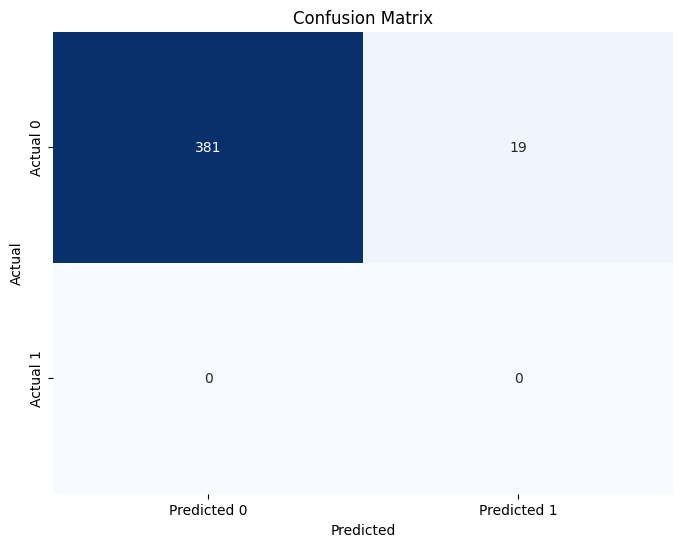

In [128]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example data (update this based on your predictions and labels)
# Replace with your actual predictions and true labels
y_true = [0]*400 + [1]*0  # True labels (400 instances of class 0 and 0 of class 1)
y_pred = [0]*381 + [1]*19  # Predicted labels (381 instances predicted as 0, 19 as 1)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])

# Add labels and title
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

# Show the plot
plt.show()



In [129]:
# Calculate accuracy
accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 95.25%
